# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 2 - ODE in 3D

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Projectile in 2D without air resistance

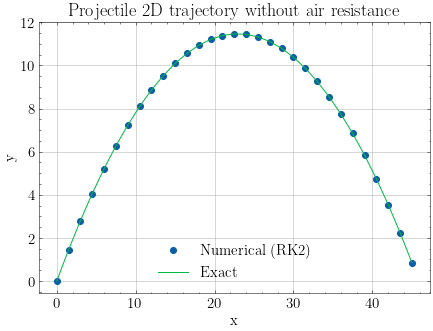

In [50]:
dt = 0.1
t = np.arange(0, 3.0 + dt, dt)

x0 = 0.0
y0 = 0.0
vy0 = 15.0
vx0 = 15.0


def rk2(f, x, t, dt):
    """Compute the next step using RK2."""
    k1 = f(x, t)
    k2 = f(x + 0.5*dt*k1, t + 0.5*dt)
    x = x + dt*k2
    return x


def fy(vy_y, t):
    vy, y = vy_y
    g = 9.81
    
    dvy_dt = -g
    dy_dt = vy
    
    return np.array([dvy_dt, dy_dt])

def fx(vx_x, t):
    vx, x = vx_x
    
    dvx_dt = 0.0
    dx_dt = vx
    
    return np.array([dvx_dt, dx_dt])

def free_projectile_exact(t):
    return [x0 + vx0*t, y0 + vy0*t -0.5*9.81*t**2]


def solve_ode(method, v0, r0, t, dt):
    vx0, vy0 = v0
    x0, y0 = r0
    N = len(t)
    
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    
    x[0] = x0
    vx[0] = vx0
    y[0] = y0
    vy[0] = vy0
    
    for i in range(N-1):
        vx[i+1], x[i+1] = method(fx, (vx[i], x[i]), t[i], dt)
        vy[i+1], y[i+1] = method(fy, (vy[i], y[i]), t[i], dt)
    
    return (vx, vy, x, y)

vx, vy, x, y = solve_ode(rk2, (vx0, vy0), (x0, y0), t, dt)

plt.plot(x,y, marker='o', linestyle='', label='Numerical (RK2)')
plt.plot(free_projectile_exact(t)[0], free_projectile_exact(t)[1], label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile 2D trajectory without air resistance')
plt.grid()
plt.legend()
plt.show()

## Projectile in 3D without air resistance

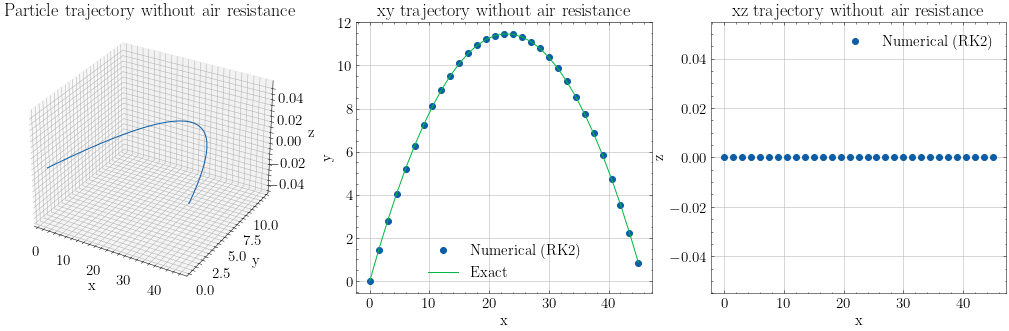

In [55]:
dt = 0.1
t = np.arange(0, 3.0 + dt, dt)

x0 = 0.0
y0 = 0.0
z0 = 0.0
vy0 = 15.0
vx0 = 15.0
vz0 = 0.0

def fx(vx_x, t):
    vx, x = vx_x
    dvx_dt = 0.0
    dx_dt = vx
    return np.array([dvx_dt, dx_dt])


def fy(vy_y, t):
    vy, y = vy_y
    g = 9.81
    dvy_dt = -g
    dy_dt = vy
    return np.array([dvy_dt, dy_dt])


def fz(vz_z, t):
    vz, z = vz_z
    dvz_dt = 0.0
    dz_dt = vz
    return np.array([dvz_dt, dz_dt])


def solve_ode(method, v0, r0, t, dt):
    vx0, vy0, vz0 = v0
    x0, y0, z0 = r0
    
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    vz = np.zeros(N)
    
    x[0] = x0
    y[0] = y0
    z[0] = z0
    vx[0] = vx0
    vy[0] = vy0
    vz[0] = vz0
    
    for i in range(N-1):
        vx[i+1], x[i+1] = method(fx, (vx[i], x[i]), t[i], dt)
        vy[i+1], y[i+1] = method(fy, (vy[i], y[i]), t[i], dt)
        vz[i+1], z[i+1] = method(fz, (vz[i], z[i]), t[i], dt)
    
    return (vx, vy, vz, x, y, z)

vx, vy, vz, x, y, z = solve_ode(rk2, (vx0, vy0, vz0), (x0, y0, z0), t, dt)

fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot3D(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle trajectory without air resistance')

fig.add_subplot(1, 3, 2)
plt.plot(x, y, marker='o', linestyle='', label='Numerical (RK2)')
plt.plot(free_projectile_exact(t)[0], free_projectile_exact(t)[1], label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy trajectory without air resistance')
plt.grid()
plt.legend()

fig.add_subplot(1, 3, 3)
plt.plot(x, z, marker='o', linestyle='', label='Numerical (RK2)')
plt.xlabel('x')
plt.ylabel('z')
plt.title('xz trajectory without air resistance')
plt.grid()
plt.legend()

plt.show()

## Projectile in 3D with quadratic air resistance (Magnus effect)

In [56]:
dt = 0.01
t = np.arange(0, 1.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))
omega = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

v_initial = 30.0
theta = np.pi/3
vx0 = v_initial*np.cos(theta)
vy0 = v_initial*np.sin(theta)
vz0 = 0.0

omega_x_0 = 2*np.pi*40 # 2400 rpm
omega_y_0 = 0.0
omega_z_0 = 0.0


r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0
v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0
omega[0,0] = omega_x_0
omega[1,0] = omega_y_0
omega[2,0] = omega_z_0


def f_magnus(ri, vi, omega_i, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    omega_xi, omega_yi, omega_zi = omega_i
    v_norm_i = np.linalg.norm(vi)
    g = 9.81
    m = 0.15
    c_d = 6e-3
    c_m = 4e-4
    
    fx = -c_d*vxi*np.abs(v_norm_i) + c_m*(omega_yi*vzi - omega_zi*vyi)
    fy = -g/m - c_d*vyi*np.abs(v_norm_i) + c_m*(omega_zi*vxi - omega_xi*vzi)
    fz = -c_d*vzi*np.abs(v_norm_i) + c_m*(omega_xi*vyi - omega_yi*vxi)
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[1]*dt
        v[2, i+1] = v[2, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_magnus, r, v, t, dt)

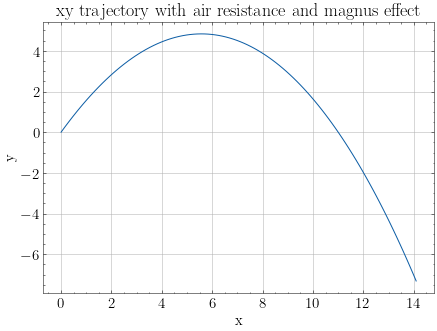

In [57]:
plt.plot(r[0, :], r[1, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy trajectory with air resistance and magnus effect')
plt.grid()
plt.show()

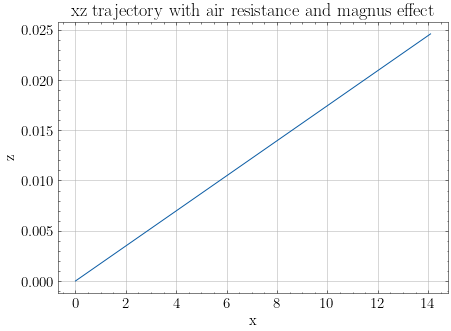

In [58]:
plt.plot(r[0, :], r[2, :])
plt.xlabel('x')
plt.ylabel('z')
plt.title('xz trajectory with air resistance and magnus effect')
plt.grid()
plt.show()

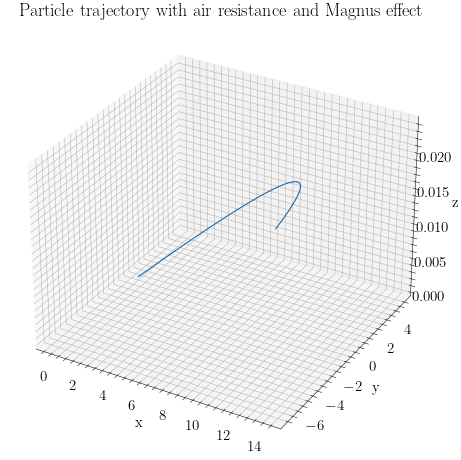

In [59]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle trajectory with air resistance and Magnus effect')
plt.show()

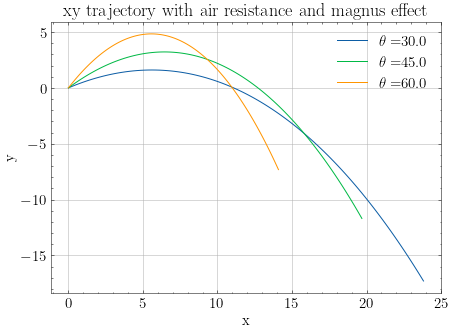

In [60]:
# For a couple of angles (30, 45, 60)

for theta in [np.pi/6, np.pi/4, np.pi/3]:
    r = np.zeros((3, N))
    v = np.zeros((3, N))
    omega = np.zeros((3, N))

    rx0, ry0, rz0 = (0.0, 0.0, 0.0)

    v_initial = 30.0
    vx0 = v_initial*np.cos(theta)
    vy0 = v_initial*np.sin(theta)
    vz0 = 0.0

    omega_x_0 = 2*np.pi*50 # 2400 rpm
    omega_y_0 = 0.0
    omega_z_0 = 0.0


    r[0,0] = rx0
    r[1,0] = ry0
    r[2,0] = rz0
    v[0,0] = vx0
    v[1,0] = vy0
    v[2,0] = vz0
    omega[0,0] = omega_x_0
    omega[1,0] = omega_y_0
    omega[2,0] = omega_z_0

    r, v = solver_ode(f_magnus, r, v, t, dt)
    plt.plot(r[0, :], r[1, :], label=r'$\theta = $'+str(np.round(theta*180/np.pi)))


plt.xlabel('x')
plt.ylabel('y')
plt.title('xy trajectory with air resistance and magnus effect')
plt.grid()
plt.legend()
plt.show()

## Charged particle in EM field

In [61]:
dt = 0.001
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

vx0 = 1.0
vy0 = 0.0
vz0 = 0.0

r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0

v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0

def E_field(r):
    Ex = 0.0
    Ey = 0.0
    Ez = 1.0
    return [Ex, Ey, Ez]


def B_field(r):
    Bx = 0.0
    By = 0.0
    Bz = 5.0
    return [Bx, By, Bz]

def f_lorentz(r, v):
    q_m = 1.0
    
    f_mag_x = v[1]*B_field(r)[2] - v[2]*B_field(r)[1]
    f_mag_y = v[2]*B_field(r)[0] - v[0]*B_field(r)[2]
    f_mag_z = v[0]*B_field(r)[1] - v[1]*B_field(r)[0]
    
    fx = q_m*(E_field(r)[0] + f_mag_x) 
    fy = q_m*(E_field(r)[1] + f_mag_y)
    fz = q_m*(E_field(r)[2] + f_mag_z)
    return [fx, fy, fz]

N = len(t)
for i in range(N-1):
    # Solving velocities
    v[0, i+1] = v[0, i] + f_lorentz(r[:,i], v[:,i])[0]*dt
    v[1, i+1] = v[1, i] + f_lorentz(r[:,i], v[:,i])[1]*dt
    v[2, i+1] = v[2, i] + f_lorentz(r[:,i], v[:,i])[2]*dt

    # Solving positions
    r[0, i+1] = r[0, i] + v[0, i+1]*dt
    r[1, i+1] = r[1, i] + v[1, i+1]*dt
    r[2, i+1] = r[2, i] + v[2, i+1]*dt
    


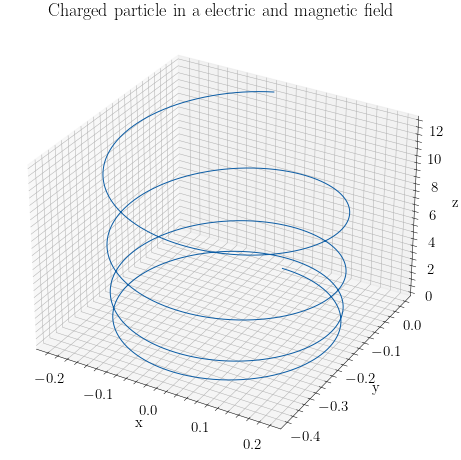

In [62]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Charged particle in a electric and magnetic field')
plt.show()

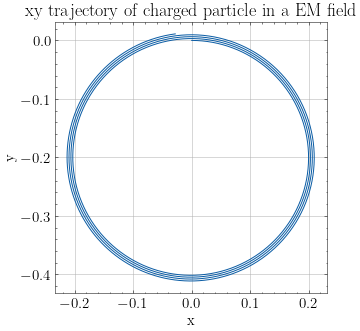

In [63]:
plt.plot(r[0,:], r[1,:])
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy trajectory of charged particle in a EM field')
plt.grid()
plt.show()

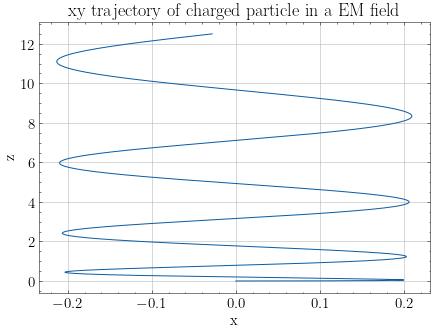

In [64]:
plt.plot(r[0,:], r[2,:])
plt.xlabel('x')
plt.ylabel('z')
plt.title('xy trajectory of charged particle in a EM field')
plt.grid()
plt.show()